<a href="https://colab.research.google.com/github/pcsilcan/ca/blob/master/20202/ca_20202_122_bellman_ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bellman Ford

In [1]:
import math

In [2]:
def initSingleSource(G, s):
    n = len(G)
    dist = [math.inf]*n
    path = [None]*n
    dist[s] = 0

    return dist, path

In [3]:
def relax(u, v, w, dist, path):
    f = dist[u] + w
    if dist[v] > f:
        dist[v] = f
        path[v] = u

In [4]:
def bellmanFord(G, s):
    n = len(G)
    dist, path = initSingleSource(G, s)
    for _ in range(n-1):
        for u in range(n):
            for v, w in G[u]:
                relax(u, v, w, dist, path)

    for u in range(n):
        for v, w in G[u]:
            if dist[u] + w < dist[v]:
                return None, None, False

    return dist, path, True
    

In [5]:
G = [[(3, 8)],
     [(2, 9)],
     [(0, 1), (4, -5), (6, 4)],
     [(5, 3)],
     [(0, 2)],
     [(3, 3)],
     [(4, 7), (7, -1)],
     []]

In [6]:
bellmanFord(G, 1)

([6, 0, 9, 14, 4, 17, 13, 12], [4, None, 1, 0, 2, 3, 2, 6], True)

In [7]:
%timeit bellmanFord(G, 1)

10000 loops, best of 3: 20.3 µs per loop


In [ ]:
import graphviz as gv

def drawAdjListGraph(G):
    dot = gv.Digraph(strict=True)
    n = len(G)
    for u in range(n):
        for v, w in G[u]:
            dot.edge(str(u), str(v), label=str(w))
    
    dot.graph_attr['rankdir'] = 'LR'
    return dot

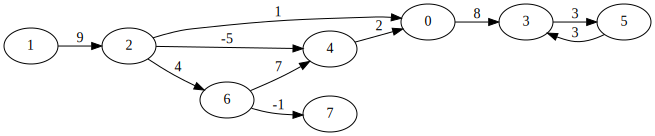

In [ ]:
drawAdjListGraph(G)